# Práctica 3 de Reconocimiento de Patrones:
## Histograma para generar Vectores de Características

Integrantes:
 - Diego Fernández Chaparro Plata Javier
 - Vargas Castro Daniel
 - Velázquez Sánchez José Antonio
 
### Objetivos
El alumno:
- Aprenderá a calcular el histograma global y local de la Imagen
- Entenderá como calcular la distancia de error entre dos histogramas
 
### Introducción

### Desarrollo

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as parches
from skimage import io
import numpy as np
from random import randint

#### A) Ecualización Local

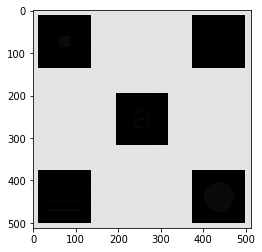

In [2]:
I = plt.imread('archivos/embedded_square.tif')
plt.imshow(I, cmap='gray', vmin= 0, vmax = 255)
plt.show()

In [3]:
#TODO: Hacer la parte A

#### B) Histogramas como vectores de características

1) Reconocimiento mediante análisis del histograma.

In [4]:
#SE CARGAN LAS IMÁGENES AL PROGRAMA.
#Diccionarios con los datos de prueba. Cada diccionario es un paciente: 
#"imgs" lleva a una lista de todas las imágenes.
#"area" es otro diccionario con las coordenadas del rectángulo que enmarca el ventrículo
imgs_prueba1 = {"imgs":[], "area":{}}
imgs_prueba2 = {"imgs":[], "area":{}}
imgs_prueba3 = {"imgs":[], "area":{}}

#Se carga la serie de imágenes de cada paciente a su diccionario correspondiente.
for i in range(0, 10):
    imgs_prueba1["imgs"].append(io.imread("archivos/ariasortiz/" + str(i) + ".png", as_gray=True))

for i in range(0, 10):
    imgs_prueba2["imgs"].append(io.imread("archivos/avila/" + str(i) + ".png", as_gray=True))
    
for i in range(0, 7):
    imgs_prueba3["imgs"].append(io.imread("archivos/boullosa/" + str(i) + ".png", as_gray=True))



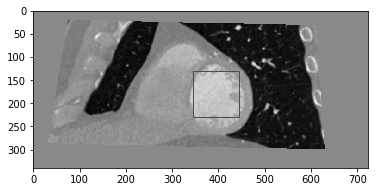

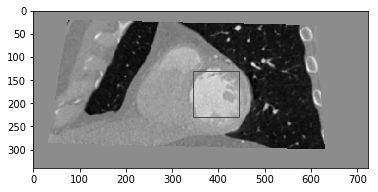

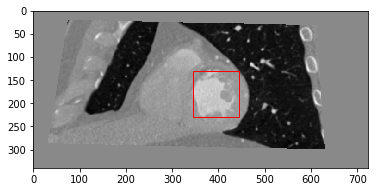

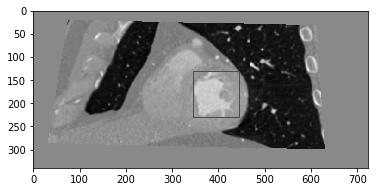

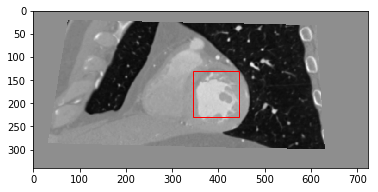

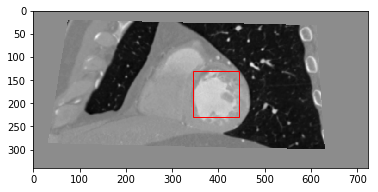

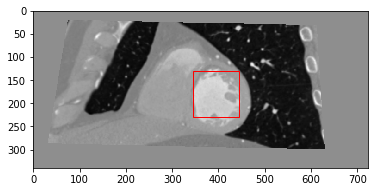

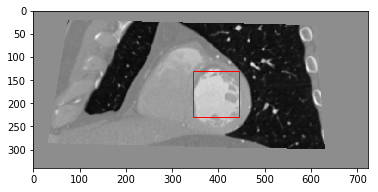

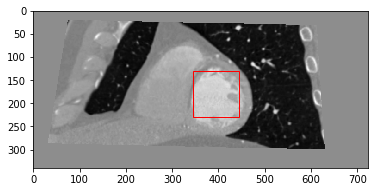

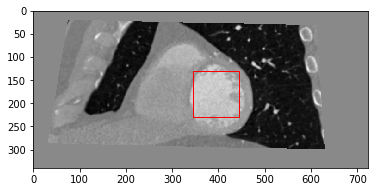

In [12]:
#ETIQUETADO DE ZONAS DE INTERÉS

#Manualmente se obtuvieron los pixeles límite aproximados de los 4 bordes del rectángulo que engloba el ventrículo.
#Dichos pixeles se almacenan como diccionarios bajo la llave "area" del diccionario de cada paciente.
imgs_prueba1["area"] = {"x_min":345, "x_max":445, "y_min":130, "y_max":230}
imgs_prueba2["area"] = {"x_min":400, "x_max":470, "y_min":210, "y_max":300}
imgs_prueba3["area"] = {"x_min":375, "x_max":475, "y_min":350, "y_max":450}

#Se imprime una prueba del área propuesta sobre una serie de imágenes.
for imagen in imgs_prueba1["imgs"]:
    fig, ax = plt.subplots(1)
    ax.imshow(imagen, cmap='gray')
    #Se crea un parche con el rectángulo que recubre el ventrículo
    rect = parches.Rectangle((imgs_prueba1["area"]["x_min"], imgs_prueba1["area"]["y_min"]),
                             imgs_prueba1["area"]["x_max"] - imgs_prueba1["area"]["x_min"],
                             imgs_prueba1["area"]["y_max"] - imgs_prueba1["area"]["y_min"], 
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

In [15]:
#OBTENCIÓN DE PARCHES Y SUS HISTOGRAMAS

#Esta función recibe una imagen y un diccionario con los bordes de los rectángulos que enmarcan el ventrículo.
#Calcula 10 parches de la imagen y regresa el promedio de sus histogramas en el formato de numpy.
def obtener_histograma_promedio(img, area_interes):
    histogramas = []
    histograma_promedio = []
    
    for i in range (0, 10):
        #Se obtienen las filas y columnas correspondientes al rectángulo
        fila_min = randint(area_interes["y_min"], area_interes["y_max"]-9)
        col_min = randint(area_interes["x_min"], area_interes["x_max"]-9)
        fila_max = fila_min + 9
        col_max = col_min + 9

        #Se crea un shape con esas filas y columnas
        shape = img[fila_min:fila_max, col_min:col_max]

        #Se acumulan los histogramas de cada shape en una lista.
        histogramas.append(np.histogram(shape.flatten(), range(0, 256)))
    
    #Se asigna un valor inicial al histograma promedio
    histograma_promedio = histogramas[0]
    histograma_promedio = list(histograma_promedio)  #Se hace lista para poder mutarlo
    
    #Se obtiene el primedio de los histogramas a partir de la lista de histogramas de shapes.
    for histograma in histogramas[1:]:
        histograma_promedio[0] = histograma_promedio[0] + histograma[0]
    histograma_promedio[0] = histograma_promedio[0]/10
    
    return histograma_promedio

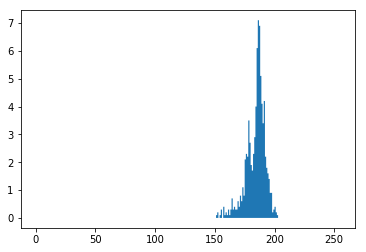

In [16]:
#Prueba de la función anterior.
#Se obtienen y grafican los histograma de los shapes de una imagen de prueba.
histograma_promedio = obtener_histograma_promedio(imgs_prueba1["imgs"][0], imgs_prueba1["area"])

plt.fill_between(histograma_promedio[1], np.concatenate(([0], histograma_promedio[0])), step="pre")
plt.show()

### Conclusiones

### Fuentes